# MSAIL Tutorial Series
## Session 01
### Gaussian Mixture Models

### Outline

 1. Recap
   1. Machine Learning, Unsupervised Learning, Clustering
   2. Iteration, K-Means
   4. X Dataset. Doubt.
 2. Gaussians and GMM
   1. Unknowns: centers, spread/shape; continuous associations
   2. Model spread/shape by Gaussians: 1d->2d->beyond [plots!]
   3. GMM overview
   4. Expectation Maximization
 3. Hands-on
   1. 1D Dataset
   2. 2D Dataset
 4. Applications of Clustering
 5. Wrap-up
   1. Density Estimation + Generative Models on Iris
   2. Discussion

## Recap
Last week, we learned about **K-means**, which worked by continually updating the location of k **centroids** which were used to cluster data. As the positions of the centroids were updated, each data point was paired with the cosest centroid. Sets of data associated with each centroid formed **clusters**. 

K-means is a reasonably intuative way to perform clustering of data, but it's also somewhat limited. 

Today we're going to approach clustering from a different angle. Instead of pairing each data point with its closest centroid, we're going to allow for **uncertainty**. 

## Gaussian Mixture Model

The Gaussian Mixture Model (GMM) works by giving each data point a probability of being part of any given cluster. Now, instead of being paired with only one cluster, there exsists a probability that a data point can be paired with any cluster.

Instead of updating the position of k centroids, we will consider not only the position of the centroid, but the shape of the cluster.

<img src='shapesOfClusters.png'>

Instead of just pairing a data point with its closest centroid, we're defining a **distribution**, the shape and cheracteristics of which are updated as we see more data. 

## E / M Algorithm

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture, datasets
from mpl_toolkits.mplot3d import Axes3D

## 1D GMM Example

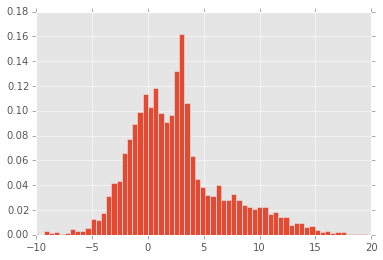

In [2]:
# Generate some random data
np.random.seed(2)
x = np.concatenate([np.random.normal(0, 2, 2000),
                    np.random.normal(5, 5, 2000),
                    np.random.normal(3, 0.5, 600)])
plt.hist(x, 80, normed=True)
plt.xlim(-10, 20);

In [3]:
# Run the GMM Fit
from sklearn.mixture import GMM
clf = GMM(4, n_iter=500, random_state=3).fit(x)
xpdf = np.linspace(-10, 20, 1000)
density = np.exp(clf.score(xpdf))

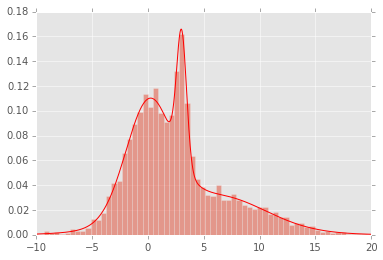

In [4]:
# Fit density
plt.hist(x, 80, normed=True, alpha=0.5)
plt.plot(xpdf, density, '-r')
plt.xlim(-10, 20);

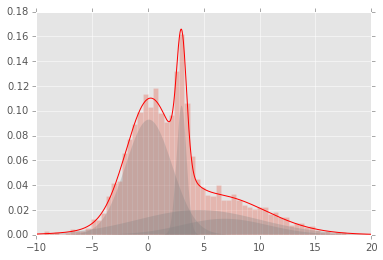

In [5]:
# Show Gaussians
plt.hist(x, 80, normed=True, alpha=0.3)
plt.plot(xpdf, density, '-r')

for i in range(clf.n_components):
    pdf = clf.weights_[i] * stats.norm(clf.means_[i, 0],
                                       np.sqrt(clf.covars_[i, 0])).pdf(xpdf)
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(-10, 20);

For thoes interested, you can run these commands to learn abour the gaussians that form the mixtures. 

In [6]:
# clf.means_
# clf.covars_
# clf.weights_

## 2D GMM Example

In [7]:
# Miscelaneous function definitions
def q(x, y):
	g1 = mlab.bivariate_normal(x, y, 1.0, 1.0, -1, -1, -0.8)
	g2 = mlab.bivariate_normal(x, y, 1.5, 0.8, 1, 2, 0.6)
	return 0.6*g1+28.4*g2/(0.6+28.4)

In [8]:
# A function that gets us some samples
def sample():
	'''Metropolis Hastings'''
	N = 10000
	s = 10
	r = np.zeros(2)
	p = q(r[0], r[1])
	samples = []
	for i in xrange(N):
		rn = r + np.random.normal(size=2)
		pn = q(rn[0], rn[1])
		if pn >= p:
			p = pn
			r = rn
		else:
			u = np.random.rand()
			if u < pn/p:
				p = pn
				r = rn
		if i % s == 0:
			samples.append(r)
 
	samples = np.array(samples)
	
	return samples

s = sample()

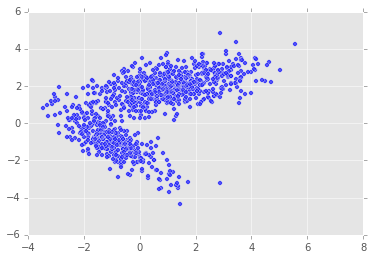

In [9]:
colors = 'b'
ax = plt.gca()
ax.scatter(s[:,0], s[:,1], c=colors, alpha=0.8)

plt.scatter(s[:, 0], s[:, 1], alpha=0.5, s=1, )

In [10]:
# Fit the data
gmix = mixture.GMM(n_components=2, covariance_type='full')
gmix.fit(s)

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=0.01)

In [11]:
# View the means in 2D space
print gmix.means_

[[ 1.02461645  1.98890613]
 [-0.97034359 -1.02957882]]


<a list of 16 text.Text objects>

C:\Users\Aaron\Anaconda\lib\site-packages\matplotlib\text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
C:\Users\Aaron\Anaconda\lib\site-packages\matplotlib\text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


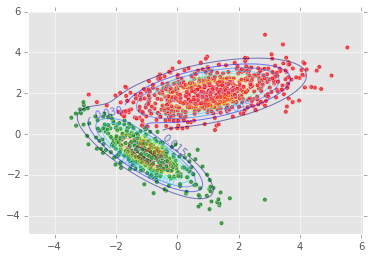

In [12]:
colors = ['r' if i==0 else 'g' for i in gmix.predict(s)]
ax = plt.gca()
ax.scatter(s[:,0], s[:,1], c=colors, alpha=0.8)

plt.scatter(s[:, 0], s[:, 1], alpha=0.5, s=1, )
 
'''Plot target'''
dx = 0.01
x = np.arange(np.min(s), np.max(s), dx)
y = np.arange(np.min(s), np.max(s), dx)
X, Y = np.meshgrid(x, y)
Z = q(X, Y)
CS = plt.contour(X, Y, Z, 10, alpha=0.5, figsize=(15, 10))
plt.clabel(CS, inline=1, fontsize=10, figsize=(15, 10))

## Uses of Clustering

To cluster is to learn when two datapoints are "the same". This is useful for:

1. Learn Features to plug into Supervised Learners
   1. Such as *Classifiers*
   2. Such as *Movie Recommenders*
   3. Learn parameters within each cluster
2. Find Species:
   1. Biological species
   2. Menu Items by Nutritional Info
   3. Voter Population by demographic statistics [helps supervised]
   4. Chemical elements; element-groups [hierarchy]
   5. Encyclopedia articles [text!?]
   6. Tissue-types by tomography-output [images are vectors]
   7. Communities within a Social Network [graphs]
   8. ???
3. Data Faking (Density Estimation Generation)
3. Signal Compression
4. System Segmentation

## Other Cool Stuff

### Clustering for... Signal Compression
![](Mandrill_Original.png)

### Clustering for... Signal Compression
![](Mandrill_GMM.png)

### Clustering for... Image Segmentation
![](Newspaper.png)

### Clustering for... Image Segmentation
![](Newspaper_Coordinates.png)

### Clustering for... Image Segmentation
![](Newspaper_Segmented.png)